<a href="https://colab.research.google.com/github/abreuzzzz/Py_Mackenzie/blob/main/Trilha_4/Trilha_4_Tarefa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

**Captura os dados de "taxa de investimentos do Brasi"**

In [2]:
PIB = pd.read_csv('https://raw.githubusercontent.com/abreuzzzz/Py_Mackenzie/main/Trilha_4/investments_percent_of_gdp.csv')

display(PIB.head())

,country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Brazil,17.9,17.2,17.8,19.8,21.6,18.8,21.8,21.8,21.4,21.7,20.5,17.4,15,14.6,15.1,15.4


**Pivoteia os dados**

In [3]:
PIB=PIB.melt(id_vars=["country"], 
        var_name="Date", 
        value_name="Value")

display(PIB.head())

,country,Date,Value
0,Brazil,2004,17.9
1,Brazil,2005,17.2
2,Brazil,2006,17.8
3,Brazil,2007,19.8
4,Brazil,2008,21.6


**Captura os dados sobre "Indice de Felicidade do Brasil"**

In [4]:
felicidade=pd.read_csv('https://raw.githubusercontent.com/abreuzzzz/Py_Mackenzie/main/Trilha_4/hapiscore_whr.csv')
display(felicidade.head())

,country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Brazil,66.4,NaN,63.2,66.9,70,68.4,70.4,66.6,71.4,69.8,65.5,63.7,63.3,61.9,63.8


**Piviteia os dados**

In [6]:
felicidade=felicidade.melt(id_vars=["country"], 
        var_name="Date", 
        value_name="Value")

display(felicidade.head())

,country,Date,Value
0,Brazil,2004,66.4
1,Brazil,2005,NaN
2,Brazil,2006,63.2
3,Brazil,2007,66.9
4,Brazil,2008,70.0


**Realiza o Join de Taxa de Felicidade para a tabela sobre o Indice de Investimento**

In [7]:
df_gdp_felicidade=pd.merge(PIB,felicidade[['Date','Value']], on='Date')
df_gdp_felicidade.head()

,country,Date,Value_x,Value_y
0,Brazil,2004,17.9,66.4
1,Brazil,2005,17.2,NaN
2,Brazil,2006,17.8,63.2
3,Brazil,2007,19.8,66.9
4,Brazil,2008,21.6,70.0


**Renomear colunas**

In [11]:
df_gdp_felicidade.rename(columns={'Value_x': 'Investimento', 'Value_y': 'Felicidade'}, inplace=True)

df_gdp_felicidade.head()

,country,Date,Investimento,Felicidade
0,Brazil,2004,17.9,66.4
1,Brazil,2005,17.2,NaN
2,Brazil,2006,17.8,63.2
3,Brazil,2007,19.8,66.9
4,Brazil,2008,21.6,70.0


# **Pergunta #1  - Ano de maior Investimento**

In [12]:
df_gdp_felicidade.nlargest(1,'Investimento')

,country,Date,Investimento,Felicidade
6,Brazil,2010,21.8,70.4


R: Pode-se observar que o ano de maior investimento no Brasil foi em 2010

# **Pergunta #2 - Ano com menor investimento**

In [14]:
df_gdp_felicidade.nsmallest(1,'Investimento')

,country,Date,Investimento,Felicidade
13,Brazil,2017,14.6,61.9


R: Pode-se observar que o ano de menor investimento no Brasil foi em 2017

# **Pergunta #3 - Ano de maior taxa de felicidade**

In [15]:
df_gdp_felicidade.nlargest(1,'Felicidade')

,country,Date,Investimento,Felicidade
8,Brazil,2012,21.4,71.4


R: Pode-se observar que o ano de maior felicidade no Brasil foi em 2012

# **Pergunta #4 - Ano de menor taxa de felicidade**

In [17]:
df_gdp_felicidade.nsmallest(1,'Felicidade')

,country,Date,Investimento,Felicidade
13,Brazil,2017,14.6,61.9


R: Pode-se observar que o ano de menor felicidade no Brasil foi em 2017

# **Pergunta #5 - Gráfico de tendencia de Investimento**

In [36]:
df_gdp_felicidade.Date = pd.to_datetime(df_gdp_felicidade.Date, format='%Y', errors='coerce')

display(df_gdp_felicidade.dtypes)


country                 object
Date            datetime64[ns]
Investimento           float64
Felicidade             float64
dtype: object

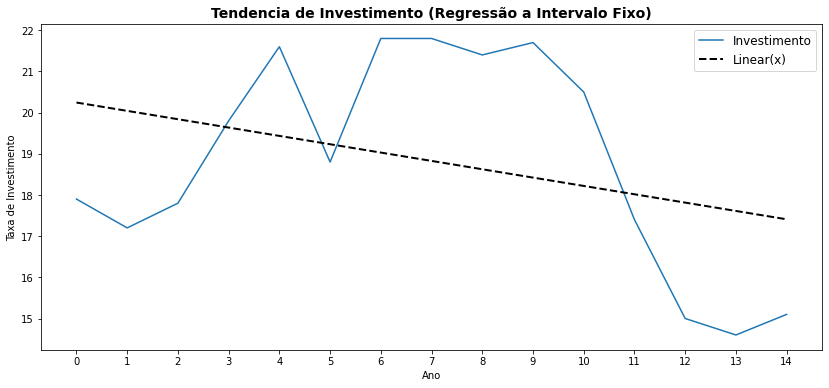

In [53]:
from IPython.core.pylabtools import figsize
from pandas.core.indexes.numeric import Int64Index
df_gdp_felicidade.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64')

fig, ax = plt.subplots(figsize=(14,6))

ax.plot(df_gdp_felicidade.index, df_gdp_felicidade.Investimento, label='Investimento')

ax.set_title ('Tendencia de Investimento (Regressão a Intervalo Fixo)', fontsize=14, weight='bold')
ax.set_xlabel ("Ano")
ax.set_ylabel ("Taxa de Investimento")

z = np.polyfit(df_gdp_felicidade.index,df_gdp_felicidade.Investimento, 1)
p = np.poly1d(z)
ax.plot(df_gdp_felicidade.index,p(df_gdp_felicidade.index), linestyle='dashed', label='Linear(x)', linewidth=2, color='k')

ax.legend(fontsize=12)

import matplotlib.ticker as ticker

ax.xaxis.set_major_locator(ticker.MaxNLocator(16))

plt.show()

R: A tendencia de Investimento é de queda ao longo da série temporal.

In [61]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

normalizado_df_gdp_felicidade = df_gdp_felicidade

normalizado_df_gdp_felicidade[['Investimento', 'Felicidade']] = scaler.fit_transform(normalizado_df_gdp_felicidade[['Investimento', 'Felicidade']])

normalizado_df_gdp_felicidade

,country,Date,Investimento,Felicidade
0,Brazil,2004-01-01,0.458333,0.473684
1,Brazil,2005-01-01,0.361111,NaN
2,Brazil,2006-01-01,0.444444,0.136842
3,Brazil,2007-01-01,0.722222,0.526316
4,Brazil,2008-01-01,0.972222,0.852632
5,Brazil,2009-01-01,0.583333,0.684211
6,Brazil,2010-01-01,1.000000,0.894737
7,Brazil,2011-01-01,1.000000,0.494737
8,Brazil,2012-01-01,0.944444,1.000000
9,Brazil,2013-01-01,0.986111,0.831579


# **Pergunta #6 - Relação de Investimento vs Felicidade no Brasil**

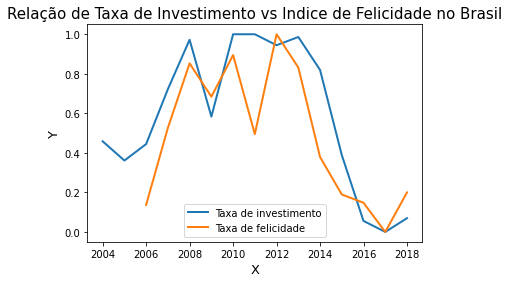

In [70]:
import numpy as np
import matplotlib.pyplot as plt 

x=normalizado_df_gdp_felicidade.Date
y1=normalizado_df_gdp_felicidade.Investimento
y2=normalizado_df_gdp_felicidade.Felicidade

plt.plot(x,y1,lw = 2., label='Taxa de investimento')
plt.plot(x,y2,lw = 2., label='Taxa de felicidade')

plt.title("Relação de Taxa de Investimento vs Indice de Felicidade no Brasil",fontsize=15)
plt.xlabel("X",fontsize=13)
plt.ylabel("Y",fontsize=13)
plt.legend()
plt.show()

R: Existe uma clara relação da taxa de felicidade no Brasil ser diretamente influenciada pela taxa de investimentos. A queda nos investimentos reflete em uma queda ainda maior na taxa de felicidade.

# **# Conclusão**

Ao analisar os dados sobre taxa de investimentos e taxa de felicidade, notei que existe uma influencia da taxa de investimentos relaconada diretamente à taxa de felicidade, sendo que a tendencia da taxa de investimento é de baixa segundo a série temporal.